# HMM-RNN Experiments

This notebook demonstrates how to run experiments using the MANAGER class.

In [ ]:
from scripts.manager import Manager
from scripts.mechint import load_weights, locate_areas, noise_sensitivity, residency_plot, neuron_activities, weight_matrices, mean_activities, pca_evolution, ablation

## Run a Single Experiment

Let's run a single model training with verbose output to see the training progress.

In [ ]:
# Initialize a list of sequence lengths to experiment with
seq_lengths = [100]
configs = ["HMMTwo"]
for name in configs:
    print(f"\n--- Running experiment with config = {name} ---\n")
        
    for seq_len in seq_lengths:
        print(f"\n--- Running experiment with seq_len = {seq_len} ---\n")

        manager = Manager(config_name=name)
        manager.config['seq_len'] = seq_len
        
        # Run the experiment with verbose output
        results = manager.run_experiment(verbose=True)
    
print("\n--- All experiments completed ---")

## Running Multiple Experiments

You can also run multiple experiments in sequence.

In [ ]:
# Create a new manager
multi_manager = Manager()

# Run multiple experiments
config_names = ["HMMTwo", "HMMThree", "HMMFour", "HMMFive"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=False)

## Training with Evolution

Training the model with the option to save the model at every epoch

In [ ]:
manager = Manager(config_name="HMMTwo")
results = manager.run_training_evo(verbose=True)
print(f"Best Loss: {results['best_loss']}")
print(f"Experiment Duration: {results['experiment_duration_minutes']} minutes")

## Exploration of State Space

### Residency Times and Average Logit Gradient Sign Changes

In [ ]:
residency_plot("HMMTwo", "/home/elia/Documents/rnnrep/Experiments/grid_search_20250412_021154/HMMTwo/hidden_150/input_100/seed_0/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", sigma=1, max_steps=60, t0=20, T=1000, n_samples=10)

### Noise Sensitivity

In [ ]:
W_r, W_n, W_o = load_weights("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9, visual_check=False)
noise_sensitivity("HMMTwo", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

### Kick Neurons

In [ ]:
neuron_activities("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")

### Noise Integrating Populations

In [ ]:
W_r, _, _ = load_weights("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")
weight_matrices(W_r)

### Oscillations in Mean Activity of Kick Neurons and Noise Integrating Populations

In [ ]:
mean_activities("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")

### State Space Across Epochs

In [ ]:
pca_evolution("/home/elia/Documents/rnnrep/Experiments/grid_search_20250412_021154/HMMFive/hidden_150/input_100/seed_0/models/evolution/", selected_epochs_list=[1, 50, 150, 400, 500], purple_epoch=380)

### Ablation Studies

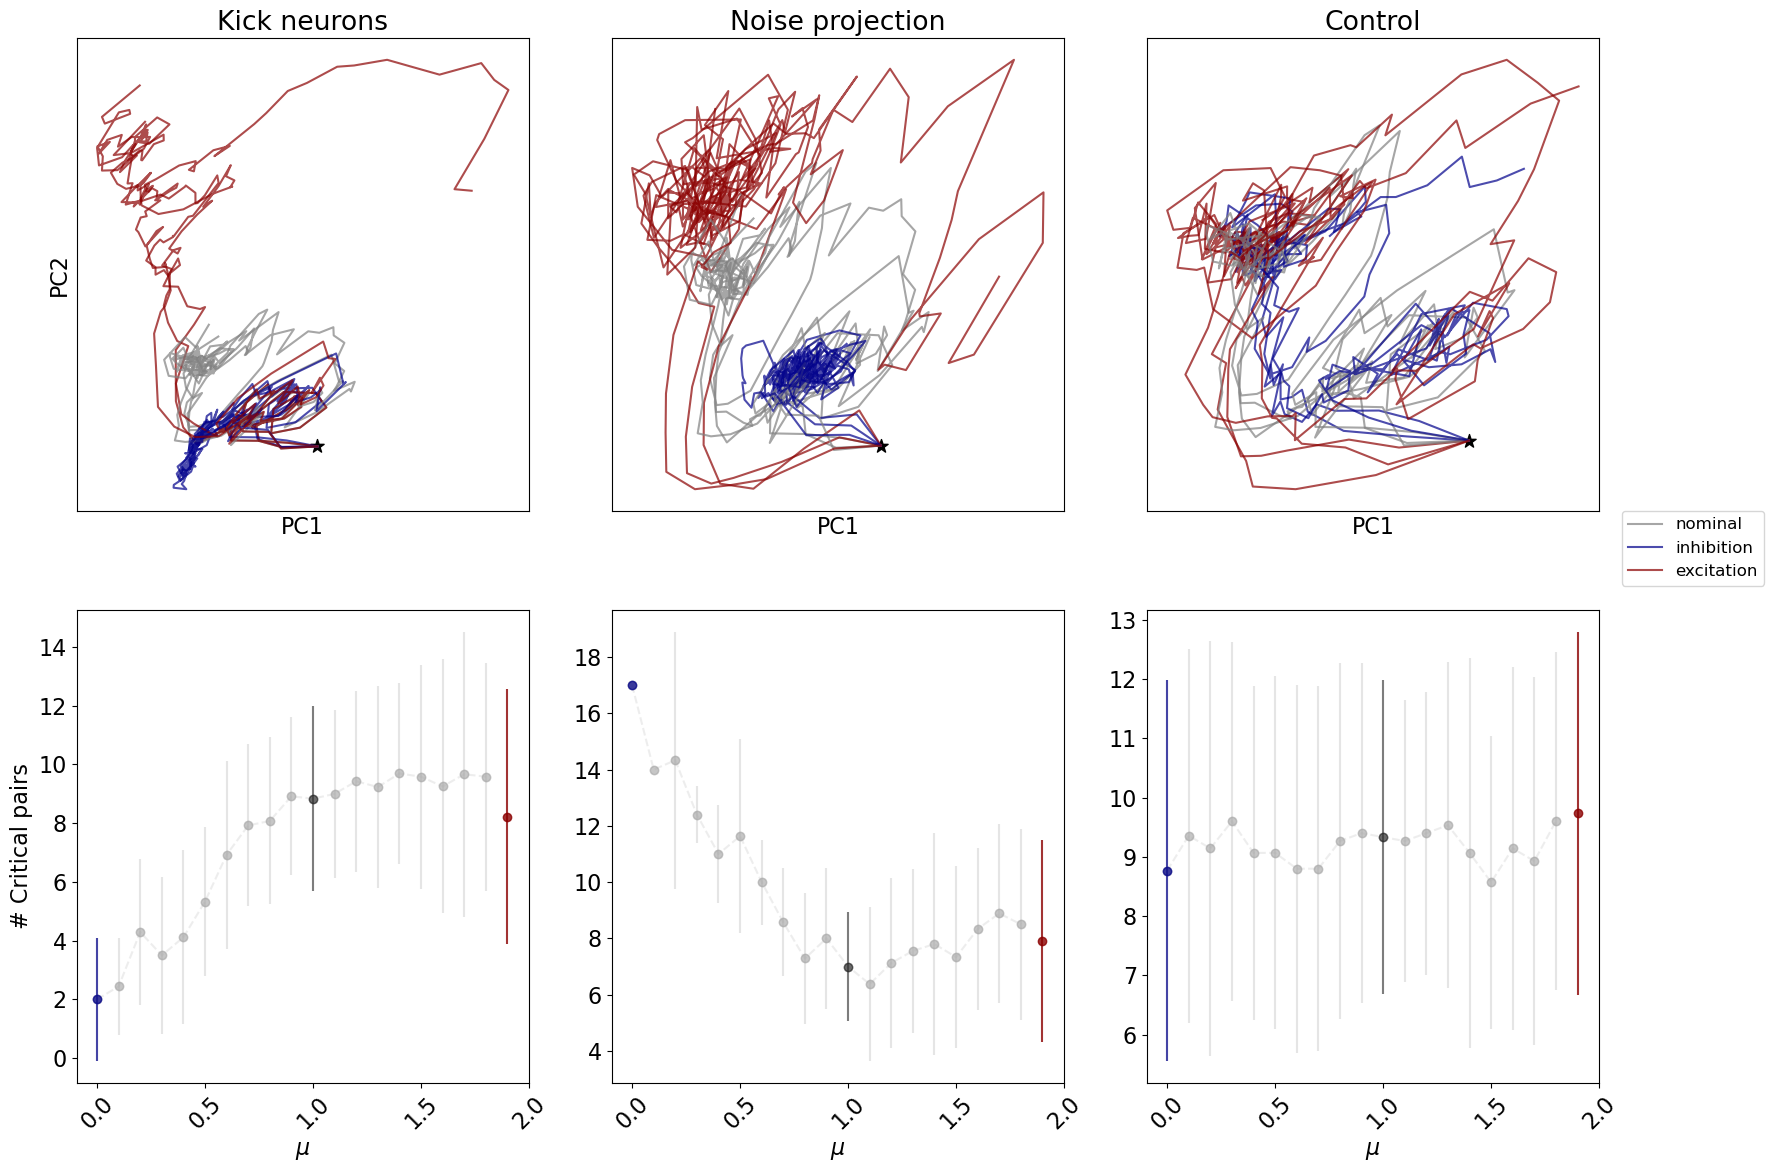

In [5]:
ablation("/home/elia/Documents/rnnrep/Experiments/2/2_100_1/HMMTwo/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")